    Usable both for regression and classification.
    No need to do feature pre-processing / normalization. Each feature is processed independently and the splitting of the data doesn't depend on the absolute scale of the feature.
    
    Goal: reduce mistakes per decision tree model (potential to overfit) by averaging performance of many models. builds and combines a forest of randomly different trees in parallel.
    
    Random variation during tree building happens in two ways: 
        - randomized bootstrap samples: the data used to build each tree is selected randomly and 
        - randomized feature splits:  the features chosen in each split tests are also randomly selected. 
    Best split search at a node: instead of finding the best split across all possible features, a random subset of features is chosen and the best split is found within that smaller subset of features.
    
    
    RandomForestClassifier parameters: 
        - n_estimators: number of trees to be used in ensemble. Must be larger (==> more computation) for larger datasets to reduce overfitting. 
        - max_features:
            - default works quite well in practice: 
                -classification ==>  the square root of the total number of features 
                -regression ==> the log base two of the total number of features,  
            - explicitly adjusting max_features may give some additional performance gain 
            - smaller values of max features tending to reduce overfitting. 
        - max_depth. controls the depth of each tree.  default None (splits until all leaves are pure).
        - n_jobs: how many cores to use in parallel during training.
        - random_state: choose a fixed setting if you need reproducible results

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap

from adspy_shared_utilities import plot_feature_importances
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


    FRUIT DATASET


In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
print (pd.DataFrame(fruits).info())

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

print (X_fruits.head())
print(y_fruits.head())

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits.values,
                                                                            y_fruits.values,
                                                                            random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None
   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60
3     4.7    6.2    86         0.80
4     4.6    6.0    84         0.79
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [3]:
iris = load_iris()
print(pd.DataFrame(iris.data).info())
print (iris.keys())

print (pd.DataFrame(iris.data).head())
print (pd.DataFrame(iris.target).head())

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, 
                                                                        iris.target, 
                                                                        random_state = 3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   0
0  0
1  0
2  0
3  0
4  0


# RANDOM FORESTS

FRUIT DATASET

<IPython.core.display.Javascript object>


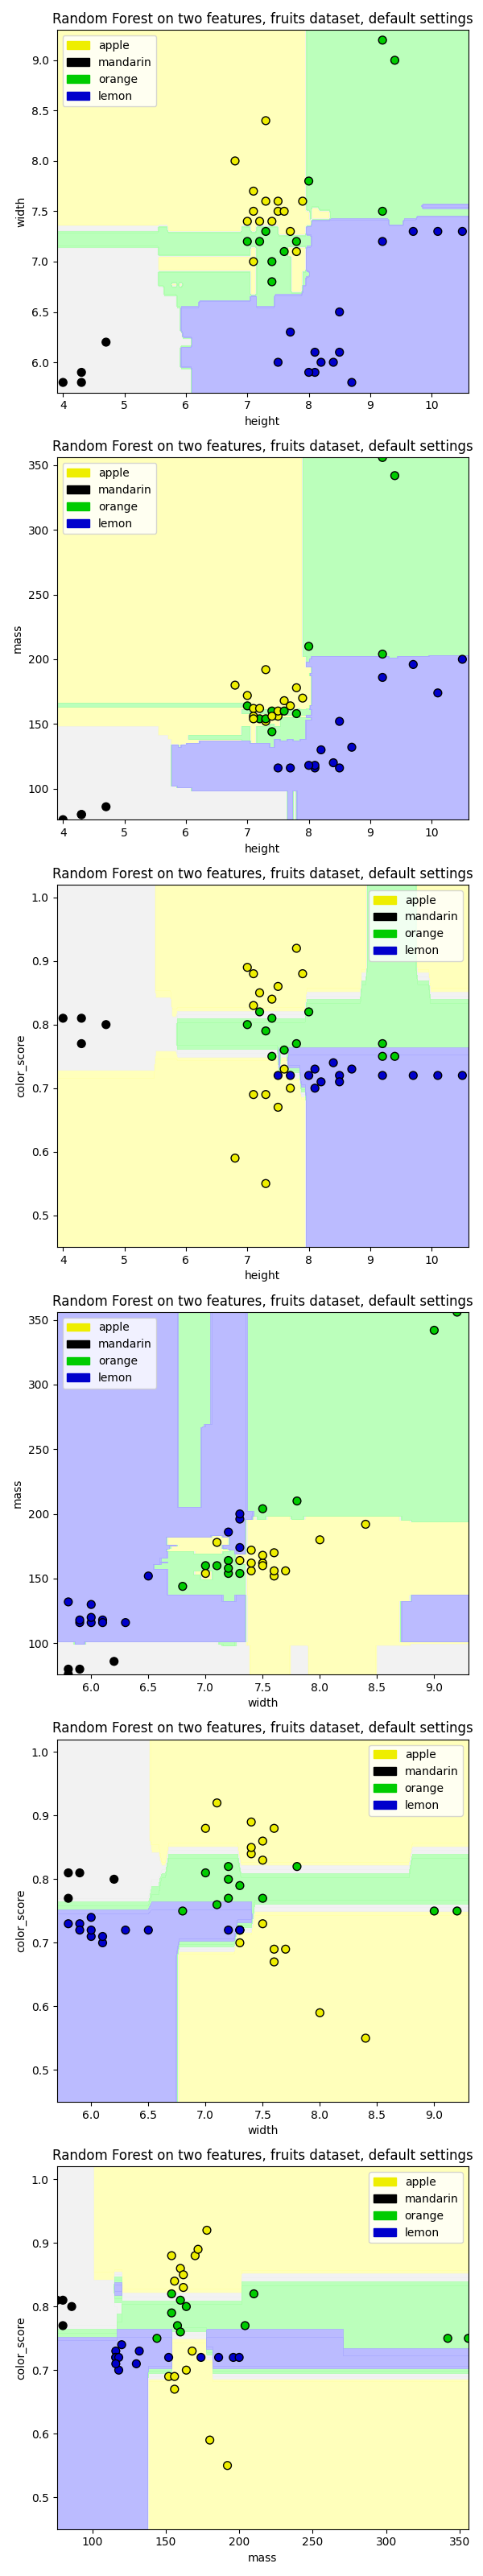

------------------------------------------------------
   feature1_index  feature2_index  train_accuracy  test_accuracy
0               0               1             1.0       0.600000
1               0               2             1.0       0.666667
2               0               3             1.0       0.800000
3               1               2             1.0       0.666667
4               1               3             1.0       0.733333
5               2               3             1.0       0.800000
------------------------------------------------------
Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [4]:

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest on two features, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

train_test_accuracy = []

# iterate through pairs of feature columns in the dataset. 
for pair, axis in zip(pair_list, subaxes):
    X = X_train_fruit[:, pair]
    y = y_train_fruit
    
    # random forest classifier learned on two features, the randomness comes from bootstrapping the training data
    
    clf = RandomForestClassifier().fit(X, y)
    
    # evaluation criteria
    train_accuracy = clf.score(X, y)
    test_accuracy = clf.score(X_test_fruit[:, pair], y_test_fruit)
    train_test_accuracy.append([pair[0], pair[1],  train_accuracy, test_accuracy])
    
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

print ("------------------------------------------------------")
train_test_accuracy_df = pd.DataFrame(train_test_accuracy)
train_test_accuracy_df.columns = ["feature1_index", "feature2_index", "train_accuracy", "test_accuracy"]
print (train_test_accuracy_df)
print ("------------------------------------------------------")


# Random Forest Classifier on 10 estimators, 
clf = RandomForestClassifier(n_estimators = 10,
                             random_state=0).fit(X_train_fruit, y_train_fruit)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

    RandomForestClassifier parameters: 
    - n_estimators: number of trees to be used in ensemble. Must be larger (==> more computation) for larger datasets to reduce overfitting. 
    - max_features:
        - default works quite well in practice: 
            -classification ==>  the square root of the total number of features 
            -regression ==> the log base two of the total number of features,  
        - explicitly adjusting max_features may give some additional performance gain 
        - smaller values of max features tending to reduce overfitting. 
    - max_depth. controls the depth of each tree.  default None (splits until all leaves are pure).
    - n_jobs: how many cores to use in parallel during training.
    - random_state: choose a fixed setting if you need reproducible results

In [5]:
feature_names_fruits

['height', 'width', 'mass', 'color_score']

    max features defaults to 2. smaller values reduce overfitting

In [6]:
clf = RandomForestClassifier(n_estimators = 10,
                             random_state=0, 
                             max_features=3, 
                             max_depth = 5).fit(X_train_fruit, y_train_fruit)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [7]:
clf = RandomForestClassifier(n_estimators = 10,
                             random_state=0, 
                             max_features=1, 
                             max_depth = 5).fit(X_train_fruit, y_train_fruit)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.87


In [8]:
clf = RandomForestClassifier(n_estimators = 100,
                             random_state=0, 
                             max_features=1, 
                             max_depth = None).fit(X_train_fruit, y_train_fruit)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.87


    IRIS DATASET

<IPython.core.display.Javascript object>


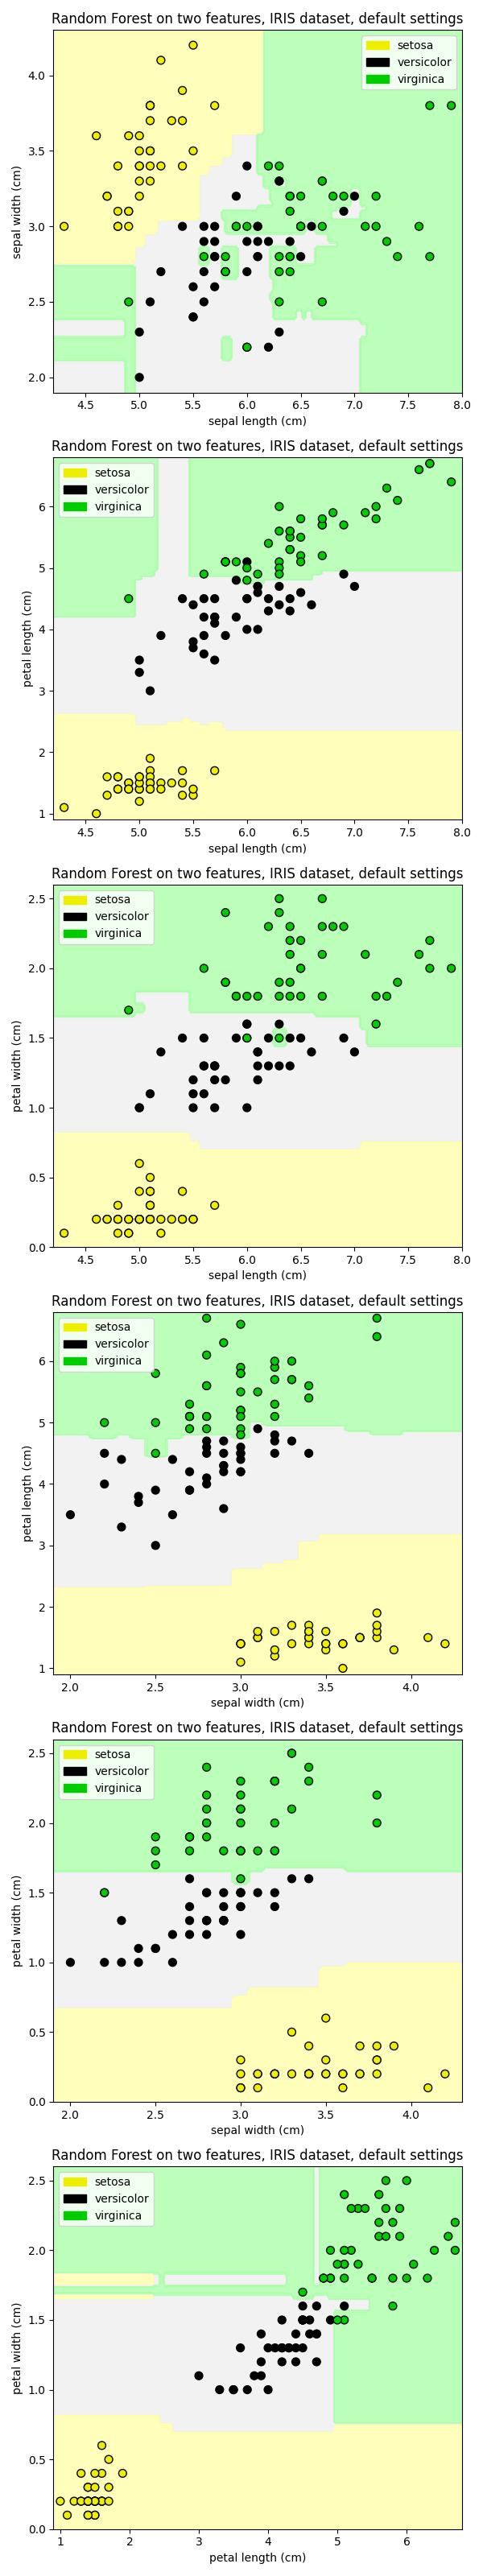

------------------------------------------------------
   feature1_index  feature2_index  train_accuracy  test_accuracy
0               0               1        0.946429       0.631579
1               0               2        1.000000       0.947368
2               0               3        0.982143       0.921053
3               1               2        0.991071       0.921053
4               1               3        0.973214       0.947368
5               2               3        0.991071       0.973684
------------------------------------------------------
Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.92


In [9]:
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest on two features, IRIS dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

train_test_accuracy = []

# iterate through pairs of feature columns in the dataset. 
for pair, axis in zip(pair_list, subaxes):
    X = X_train_iris[:, pair]
    y = y_train_iris
    
    # random forest classifier learned on two features, the randomness comes from bootstrapping the training data
    
    clf = RandomForestClassifier().fit(X, y)
    
    # evaluation criteria
    train_accuracy = clf.score(X, y)
    test_accuracy = clf.score(X_test_iris[:, pair], y_test_iris)
    train_test_accuracy.append([pair[0], pair[1],  train_accuracy, test_accuracy])
    
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
   
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

print ("------------------------------------------------------")
train_test_accuracy_df = pd.DataFrame(train_test_accuracy)
train_test_accuracy_df.columns = ["feature1_index", "feature2_index", "train_accuracy", "test_accuracy"]
print (train_test_accuracy_df)
print ("------------------------------------------------------")


# Random Forest Classifier on 10 estimators, 
clf = RandomForestClassifier(n_estimators = 10,
                             random_state=0).fit(X_train_iris, y_train_iris)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

In [10]:
clf = RandomForestClassifier(n_estimators = 100,
                             random_state=0, 
                             max_features=1, 
                             max_depth = None).fit(X_train_iris, y_train_iris)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.92


---
 # REAL WORLD DATASET: BREAST CANCER 
    
---

In [11]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print ("Type of data structure: ", type(cancer))
print ("Keys: ", cancer.keys())
print ("Feature names: ", cancer["feature_names"])

# convert to dataframe
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = pd.Series(cancer.target)
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")
print (cancerdf.head(5))

Type of data structure:  <class 'sklearn.utils.Bunch'>
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Distribution of labelled samples: 
malignant    212
benign       357
Name: target, dtype: int64
-------------------------------------------
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.8

In [12]:
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer, y_cancer, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97
